In [61]:
import numpy as np
from sentence_transformers import SentenceTransformer
from tqdm.notebook import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt

from src.datasets.who_is_who import WhoIsWhoDataset
from src.shared.database_wrapper import DatabaseWrapper
from src.shared.graph_schema import NodeType, EdgeType
from src.shared.graph_sampling import GraphSampling

In [62]:
db = DatabaseWrapper(database='dense-graph')

2024-11-26 09:35:30,914 - DatabaseWrapper - INFO - Connecting to the database ...
2024-11-26 09:35:30,915 - DatabaseWrapper - INFO - Database ready.


## Edge statistics

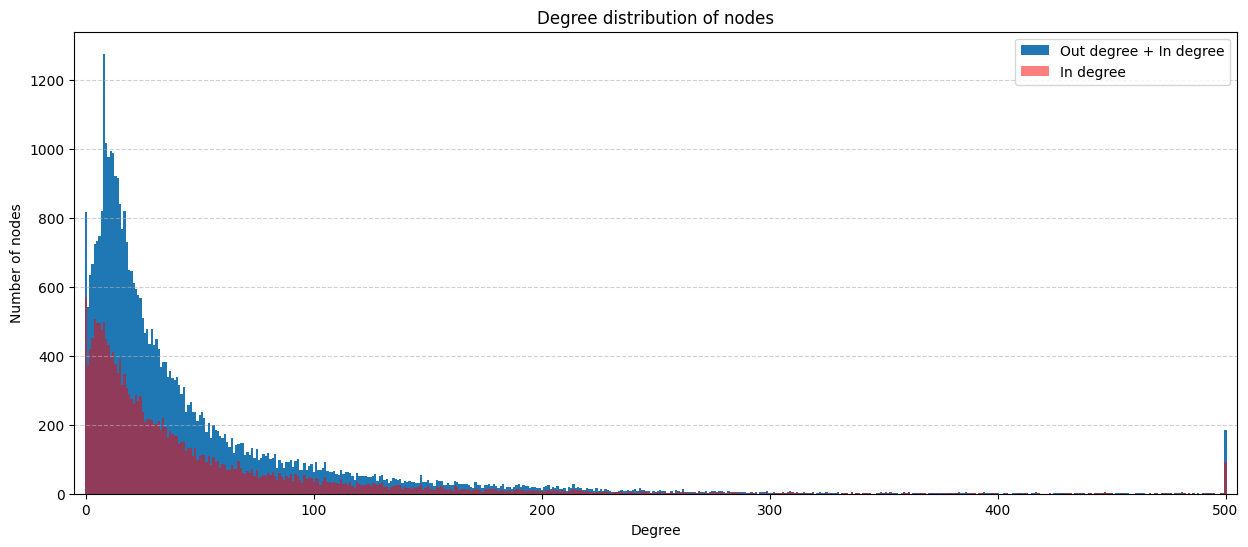

In [63]:
upper_bound = 500
bins_x = np.arange(0, upper_bound + 1, 1)
bins_y = np.zeros_like(bins_x)
bins_y_in = np.zeros_like(bins_x)
bins_y_out = np.zeros_like(bins_x)
def edges_per_node_hist():
    query = f"""
    MATCH (n:{NodeType.PUBLICATION.value})
    RETURN count {{ (n)-[]->() }} AS out_degree, count {{ ()-[]->(n) }} AS in_degree
    """
    result = db.custom_query(query)
    
    for row in result:
        out_degree = row['out_degree']
        in_degree = row['in_degree']
        if out_degree >= upper_bound:
            out_degree = upper_bound
        if in_degree >= upper_bound:
            in_degree = upper_bound
        bins_y[out_degree] += 1
        bins_y[in_degree] += 1
        bins_y_out[out_degree] += 1
        bins_y_in[in_degree] += 1
        
    
edges_per_node_hist()

plt.figure(figsize=(15, 6))
plt.bar(bins_x, bins_y, width=1)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of nodes')
plt.bar(bins_x, bins_y_in, width=1, color='red', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Out degree + In degree', 'In degree'])
# Compact the x-axis
plt.xlim(-5, 505)
plt.show()